In [2]:
import sys
import math
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
print(th.__version__)


2024.1.0


In [35]:
# Load thicket and associate num_procs with each dataframe
tk1 = th.Thicket.from_caliperreader(glob(f"/scratch/user/ivzap/Project1/src/SampleSort/Cali-Random/random/24pow/p128-n4-t32-a16777216.cali"))
df_1 = tk1.dataframe.reset_index()
df_1["num_procs"] = 128

tk2 = th.Thicket.from_caliperreader(glob(f"/scratch/user/ivzap/Project1/src/SampleSort/Cali-Random/random/24pow/p256-n8-t32-a16777216.cali"))
df_2 = tk2.dataframe.reset_index()  # tk2, not tk1
df_2["num_procs"] = 256

tk3 = th.Thicket.from_caliperreader(glob(f"/scratch/user/ivzap/Project1/src/SampleSort/Cali-Random/random/24pow/p32-n1-t32-a16777216.cali"))
df_3 = tk3.dataframe.reset_index()
df_3["num_procs"] = 32

tk4 = th.Thicket.from_caliperreader(glob(f"/scratch/user/ivzap/Project1/src/SampleSort/Cali-Random/random/24pow/p64-n2-t32-a16777216.cali"))
df_4 = tk4.dataframe.reset_index()
df_4["num_procs"] = 64

tk5 = th.Thicket.from_caliperreader(glob(f"/scratch/user/ivzap/Project1/src/SampleSort/Cali-Random/random/24pow/p16-n1-t16-a16777216.cali"))
df_5 = tk5.dataframe.reset_index()
df_5["num_procs"] = 16

tk6 = th.Thicket.from_caliperreader(glob(f"/scratch/user/ivzap/Project1/src/SampleSort/Cali-Random/random/24pow/p2-n1-t2-a16777216.cali"))
df_6 = tk6.dataframe.reset_index()
df_6["num_procs"] = 2

tk7 = th.Thicket.from_caliperreader(glob(f"/scratch/user/ivzap/Project1/src/SampleSort/Cali-Random/random/24pow/p4-n1-t4-a16777216.cali"))
df_7 = tk7.dataframe.reset_index()
df_7["num_procs"] = 4

tk8 = th.Thicket.from_caliperreader(glob(f"/scratch/user/ivzap/Project1/src/SampleSort/Cali-Random/random/24pow/p8-n1-t8-a16777216.cali"))
df_8 = tk8.dataframe.reset_index()
df_8["num_procs"] = 8

tk9 = th.Thicket.from_caliperreader(glob(f"/scratch/user/ivzap/Project1/src/SampleSort/Cali-Random/random/24pow/p512-a16777216.cali"))
df_9 = tk8.dataframe.reset_index()
df_9["num_procs"] = 512

# Optionally, combine the DataFrames for further analysis
df_hayden = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9])
df_hayden["algorithm"] = "sample"
df_hayden["input_type"] = "random"
df_hayden["input_size"] = 2**24

(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 28.67it/s]
0it [00:00, ?it/s]
(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 33.11it/s]
0it [00:00, ?it/s]
(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 33.34it/s]
0it [00:00, ?it/s]
(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 33.49it/s]
0it [00:00, ?it/s]
(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 33.73it/s]
0it [00:00, ?it/s]
(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 31.34it/s]
0it [00:00, ?it/s]
(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 33.30it/s]
0it [00:00, ?it/s]
(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 33.21it/s]
0it [00:00, ?it/s]
(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 31.15it/s]
0it [00:00, ?it/s]


In [36]:
df_hayden

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),name,num_procs,algorithm,input_type,input_size
0,"{'name': 'main', 'type': 'function'}",1345980150,1.0,regionprofile,2.267895,7.094278,5.630414,720.692983,4.678261,1.0,1.000000,1.0,128.0,1.713062,1.895130,1.829647,234.194784,main,128,sample,random,16777216
1,"{'name': 'MPI_Init', 'type': 'function'}",1345980150,2.0,regionprofile,0.000033,0.000464,0.000051,0.006560,0.000000,1.0,1.000000,1.0,128.0,0.000033,0.000464,0.000051,0.006560,MPI_Init,128,sample,random,16777216
2,"{'name': 'data_init_runtime', 'type': 'function'}",1345980150,3.0,regionprofile,0.388491,0.388491,0.388491,0.388491,0.000000,1.0,1.000000,1.0,1.0,0.388491,0.388491,0.388491,0.388491,data_init_runtime,128,sample,random,16777216
3,"{'name': 'comm', 'type': 'function'}",1345980150,4.0,regionprofile,0.126145,5.229214,3.732700,477.785557,4.697565,5.0,5.000000,5.0,640.0,0.000077,0.000143,0.000098,0.012554,comm,128,sample,random,16777216
4,"{'name': 'comm_large', 'type': 'function'}",1345980150,5.0,regionprofile,0.113556,5.168521,3.664772,469.090791,4.725262,3.0,3.000000,3.0,384.0,0.023355,0.024045,0.023568,3.016765,comm_large,128,sample,random,16777216
5,"{'name': 'MPI_Scatter', 'type': 'function'}",1345980150,6.0,regionprofile,0.027528,0.399125,0.358945,45.944939,0.001079,1.0,1.000000,1.0,128.0,0.027528,0.399125,0.358945,45.944939,MPI_Scatter,128,sample,random,16777216
6,"{'name': 'MPI_Gather', 'type': 'function'}",1345980150,14.0,regionprofile,0.000965,0.047485,0.004319,0.552816,0.000056,128.0,128.000000,128.0,16384.0,0.000965,0.047485,0.004319,0.552816,MPI_Gather,128,sample,random,16777216
7,"{'name': 'MPI_Gatherv', 'type': 'function'}",1345980150,15.0,regionprofile,0.014761,4.744970,3.277940,419.576271,4.722585,128.0,128.000000,128.0,16384.0,0.014761,4.744970,3.277940,419.576271,MPI_Gatherv,128,sample,random,16777216
8,"{'name': 'comm_small', 'type': 'function'}",1345980150,7.0,regionprofile,0.012490,0.087287,0.067830,8.682212,0.000115,2.0,2.000000,2.0,256.0,0.000036,0.000058,0.000041,0.005256,comm_small,128,sample,random,16777216
9,"{'name': 'MPI_Bcast', 'type': 'function'}",1345980150,8.0,regionprofile,0.000343,0.074531,0.056802,7.270720,0.000094,1.0,1.000000,1.0,128.0,0.000343,0.074531,0.056802,7.270720,MPI_Bcast,128,sample,random,16777216


In [3]:
#tk = th.Thicket.from_caliperreader(glob("../src/**/*.cali", recursive=True))
tk = th.Thicket.from_caliperreader(glob("/scratch/user/ivzap/Project1/MPI_Builds/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 264/264 [00:12<00:00, 21.68it/s]


In [10]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("cmdline")
tk.metadata_column_to_perfdata("algorithm")

df = tk.dataframe.reset_index()

types = []
for i in range(0, len(df.cmdline)):
    new_list = df.cmdline[i]
    
    if(isinstance(new_list, list)):
        if(len(new_list) >= 6):
            if(new_list[1] == '-t'):
                types.append(new_list[2].lower())
            elif(new_list[3] == '-t'):
                types.append(new_list[4].lower())
            elif(new_list[5] == '-t'):
                types.append(new_list[6].lower())
        elif(len(new_list) >= 4):
            types.append(new_list[3].lower())
        elif(len(new_list) >= 3 and df.cmdline[i][0] !='./radix_p'):
            types.append(new_list[2].lower())
        else:
            types.append("")
    else:
        types.append("")
        
df["input_type"] = types

df = df[df.input_type != ""]
df = df.dropna(axis=0)

df['node'] = df['node'].astype(str)
df.loc[df['input_type'] == '1percent', 'input_type'] = 'perturbed'
df.loc[df['input_type'] == '1_perc_perturbed', 'input_type'] = 'perturbed'
df.loc[df['input_type'] == 'reversesorted', 'input_type'] = 'reversed'


measurements = [
    "{'name': 'main', 'type': 'function'}",
    "{'name': 'comm', 'type': 'function'}",
    "{'name': 'comm_large', 'type': 'function'}"
]

/scratch/group/csce435-f24/thicket/thicket/thicket.py:634: UserWarning: Column num_procs already exists. Set 'overwrite=True' to force update the column.
  warnings.warn(
/scratch/group/csce435-f24/thicket/thicket/thicket.py:634: UserWarning: Column input_size already exists. Set 'overwrite=True' to force update the column.
  warnings.warn(
/scratch/group/csce435-f24/thicket/thicket/thicket.py:634: UserWarning: Column cmdline already exists. Set 'overwrite=True' to force update the column.
  warnings.warn(
/scratch/group/csce435-f24/thicket/thicket/thicket.py:634: UserWarning: Column algorithm already exists. Set 'overwrite=True' to force update the column.
  warnings.warn(


In [6]:

#df = pd.concat([df, df_hayden])
# df = df[df.algorithm == "bitonic"]
# df = df[df.input_type == "random"]

In [11]:
set(df.algorithm)

{'radix'}

In [12]:
def exponential_representation(value):
    # Find the exponent (b) for base 2
    exponent = math.log2(value)  # Calculate the logarithm base 2
    base = 2  # Base is 2

    return f"{base}^{int(exponent)}"  # Return the formatted string

def speedup_plot_algos(size, input_type, region,  df):
    plt.figure(figsize=(15, 8))
    filtered_df = df[df['name'] == region]
    filtered_df = filtered_df[filtered_df["input_size"] == size]
    aggregated_df = filtered_df.groupby(['num_procs', 'input_size', 'input_type']).agg(
        all_procs=('Max time/rank', 'sum'),
        single_proc=('Total time', 'sum')
    ).reset_index()
    
    aggregated_df['speedup'] = aggregated_df['single_proc'] / aggregated_df['all_procs']
    aggregated_df.sort_values(by=['input_size', 'num_procs'])
    
    for algo_name, group in aggregated_df.groupby('algorithm'):
        plt.plot(group['num_procs'], group['speedup'], marker='o', label=f'{algo_name}')
    
    plt.xlabel('Number of Processors (num_procs)')
    plt.ylabel('Speedup')
    plt.title(f'Speedup vs Number of Processors, Grouped by Algo(size={exponential_representation(size)}, region={region})')
    
    plt.legend(title='Algorithms')
    
    plt.grid(True)
    plt.show()

def speedup_plot_by_algorithm(size,input_type, df):
    plt.figure(figsize=(15, 8))
    filtered_df = df[df['name'].isin(['comp', 'comm'])]
    filtered_df = filtered_df[filtered_df["input_size"] == size]
    filtered_df = filtered_df[filtered_df["input_type"] == input_type]
    filtered_df = filtered_df.drop_duplicates(subset=['num_procs', 'input_size', 'input_type', 'algorithm', 'name'])
    aggregated_df = filtered_df.groupby(['num_procs', 'input_size', 'input_type','algorithm']).agg(
        all_procs=('Max time/rank', 'sum'),
        single_proc=('Total time', 'sum')
    ).reset_index()
    
    aggregated_df['speedup'] = aggregated_df['single_proc'] / aggregated_df['all_procs']
    aggregated_df.sort_values(by=['input_size', 'num_procs'])

    for algorithm, group in aggregated_df.groupby('algorithm'):
        plt.plot(group['num_procs'], group['speedup'], marker='o', label=f'{algorithm}')
    
    plt.xlabel('Number of Processors (num_procs)')
    plt.ylabel('Speedup')
    plt.title(f'Speedup vs Number of Processors, Grouped by Algorithm (input_size={exponential_representation(size)}, input_type={input_type})')
    
    plt.legend(title='Algorithm')
    
    plt.grid(True)
    plt.show()

def total_time_plot_by_algorithm(size, input_type, df):
    plt.figure(figsize=(15, 8))

  
    filtered_df = df[df['name'].isin(['comp', 'comm'])]
    filtered_df = filtered_df[filtered_df["input_size"] == size]
    filtered_df = filtered_df[filtered_df["input_type"] == input_type]

    filtered_df = filtered_df.drop_duplicates(subset=['num_procs', 'input_size', 'input_type', 'algorithm', 'name'])
    aggregated_df = filtered_df.groupby(['num_procs', 'input_size', 'input_type', 'algorithm']).agg(
        single_proc=('Avg time/rank', 'sum')
    ).reset_index()

    aggregated_df['total_time'] = aggregated_df['single_proc']

    aggregated_df = aggregated_df.sort_values(by=['input_size', 'num_procs'])

    for algorithm, group in aggregated_df.groupby('algorithm'):
        plt.plot(group['num_procs'], group['total_time'], marker='o', label=f'{algorithm}')

    plt.xlabel('Number of Processors (num_procs)')
    plt.ylabel('Total Time')
    plt.title(f'Total Time vs Number of Processors, Grouped by Algorithm (input_size={exponential_representation(size)}, input_type={input_type})')

    plt.legend(title='Algorithm')

    plt.grid(True)
    plt.show()

def total_time_plot_by_algorithm_comm(algorithm, input_type, df):
    plt.figure(figsize=(15, 8))
  
    filtered_df = df[df['name'].isin(['comm'])]
    filtered_df = filtered_df[filtered_df["input_type"] == input_type]
    filtered_df = filtered_df[filtered_df["algorithm"] == algorithm]
    filtered_df = filtered_df[~filtered_df["input_size"].isin([4,8, 256, 8192, 10000000])]
    filtered_df = filtered_df.drop_duplicates(subset=['num_procs', 'input_size', 'input_type', 'name'])

    filtered_df = filtered_df.sort_values(by=['input_size', 'num_procs'])

    for size, group in filtered_df.groupby('input_size'):
        plt.plot(group['num_procs'], group['Total time'], marker='o', label=f'{size}')

    plt.xlabel('Number of Processors (num_procs)')
    plt.ylabel('Total Time')
    plt.title(f'Total Time vs Number of Processors, Grouped by size (input_size={exponential_representation(size)}, input_type={input_type})')

    plt.legend(title='Algorithm')

    plt.grid(True)
    plt.show()

def speedup_plot(size, df, region):
    plt.figure(figsize=(15, 8))
    filtered_df = df[df['name'] == region]
    filtered_df = filtered_df[filtered_df["input_size"] == size]
    aggregated_df = filtered_df.groupby(['num_procs', 'input_size', 'input_type']).agg(
        all_procs=('Max time/rank', 'sum'),
        single_proc=('Total time', 'sum')
    ).reset_index()
    
    aggregated_df['speedup'] = aggregated_df['single_proc'] / aggregated_df['all_procs']
    aggregated_df.sort_values(by=['input_size', 'num_procs'])
    
    for input_type, group in aggregated_df.groupby('input_type'):
        plt.plot(group['num_procs'], group['speedup'], marker='o', label=f'{input_type}')
    
    plt.xlabel('Number of Processors (num_procs)')
    plt.ylabel('Speedup')
    plt.title(f'Speedup vs Number of Processors, Grouped by Input Size(size={exponential_representation(size)}, region={region})')
    
    plt.legend(title='Input Types')
    
    plt.grid(True)
    plt.show() 

def strong_plot(time_col, size, cali_region, df):
    plt.figure(figsize=(15, 8))
    local_df = df[df["name"] == cali_region]
    local_df = local_df[local_df["input_size"] == size]
    local_df = local_df.drop_duplicates(subset=['num_procs', 'input_size', 'input_type'])
    local_df = local_df.sort_values(by=['input_size', 'num_procs'])

    for input_size, group in local_df.groupby('input_type'):
        plt.plot(group['num_procs'], group[time_col], marker='o', label=f'{input_size}')

    # Add labels and title
    plt.xlabel('Number of Processors (num_procs)')
    plt.ylabel(time_col)
    plt.title(f'{time_col} vs Number of Processors, Grouped by Input Type(size={exponential_representation(size)}, {cali_region})')

    # Add a legend
    plt.legend(title='Input Types')

    # Display the plot
    plt.grid(True)
    plt.show()

def weak_plot(time_col, input_type, cali_region, df):
    plt.figure(figsize=(15, 8))
    local_df = df[df["name"] == cali_region]
    local_df = local_df[~local_df["input_size"].isin([4,8, 256, 8192, 10000000])]
    local_df = local_df[local_df["input_type"] == input_type]
    local_df = local_df.drop_duplicates(subset=['num_procs', 'input_size'])
    local_df = local_df.sort_values(by=['input_size', 'num_procs'])

    for input_size, group in local_df.groupby('input_size'):
        plt.plot(group['num_procs'], group[time_col], marker='o', label=f'{exponential_representation(input_size)}')

    # Add labels and title
    plt.xlabel('Number of Processors (num_procs)')
    plt.ylabel(time_col)
    plt.title(f'{time_col} vs Number of Processors, Grouped by Input Size({input_type}, {cali_region})')

    # Add a legend
    plt.legend(title='Input Size')

    # Display the plot
    plt.grid(True)
    plt.show()

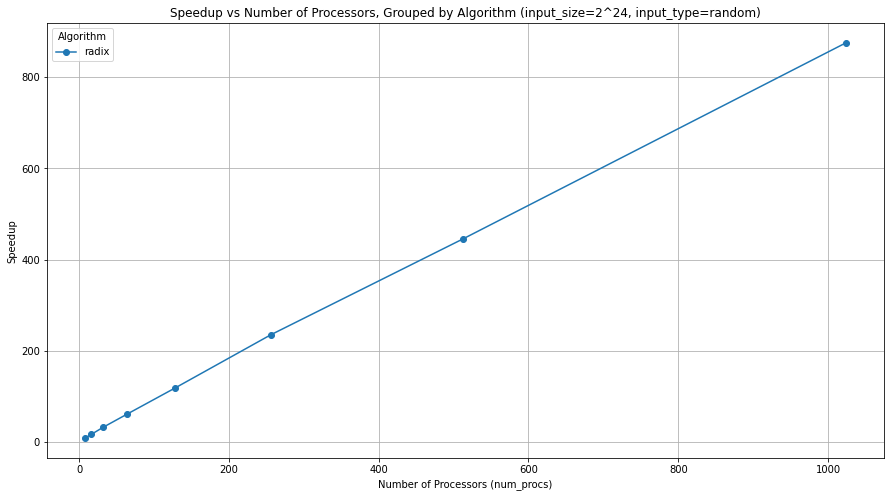

In [13]:
speedup_plot_by_algorithm(2**24, "random", df)

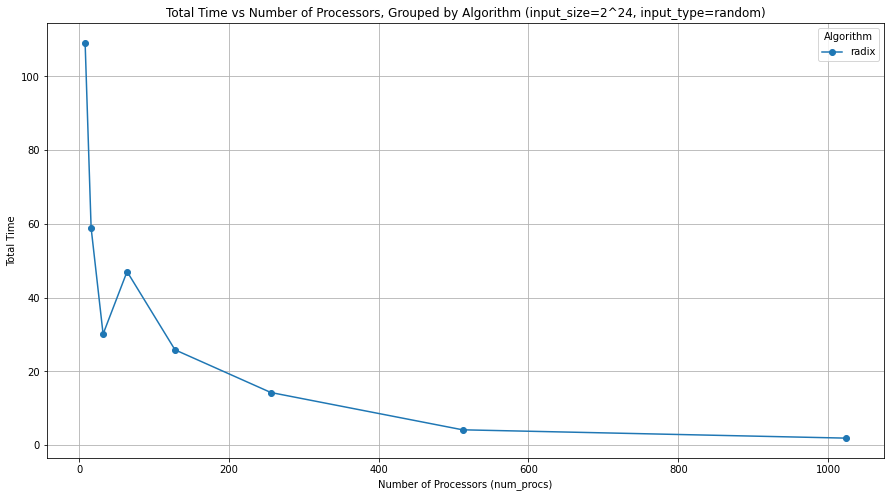

In [67]:
total_time_plot_by_algorithm(2**24, "random", df)

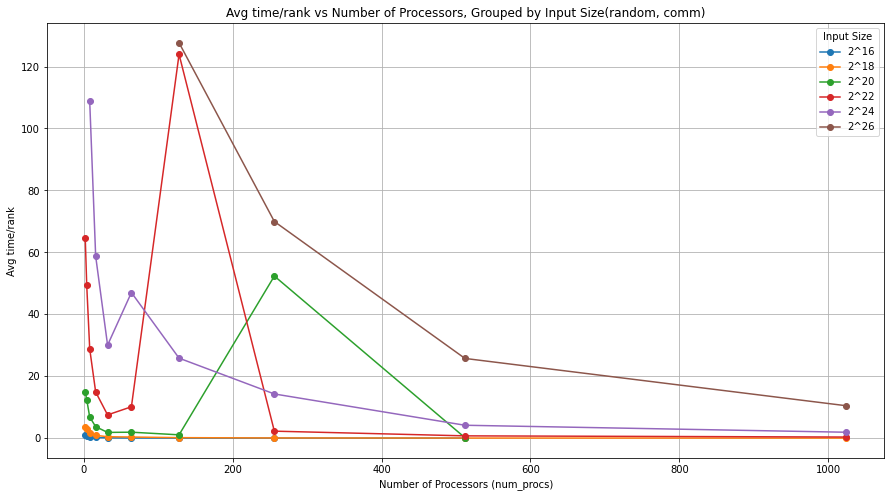

In [86]:
weak_plot("Avg time/rank", "random", "comm", df)

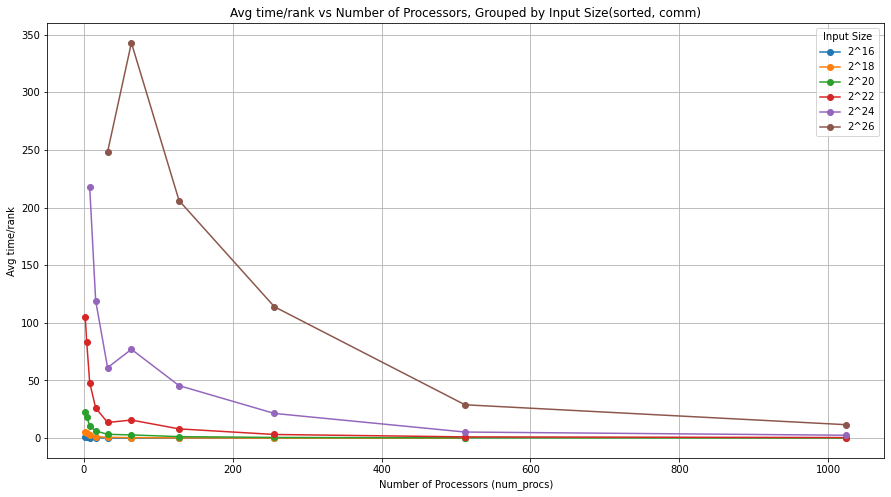

In [14]:
weak_plot("Avg time/rank", "sorted", "comm", df)

/tmp/job.11802908/ipykernel_256413/2689015630.py:173: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Input Size')


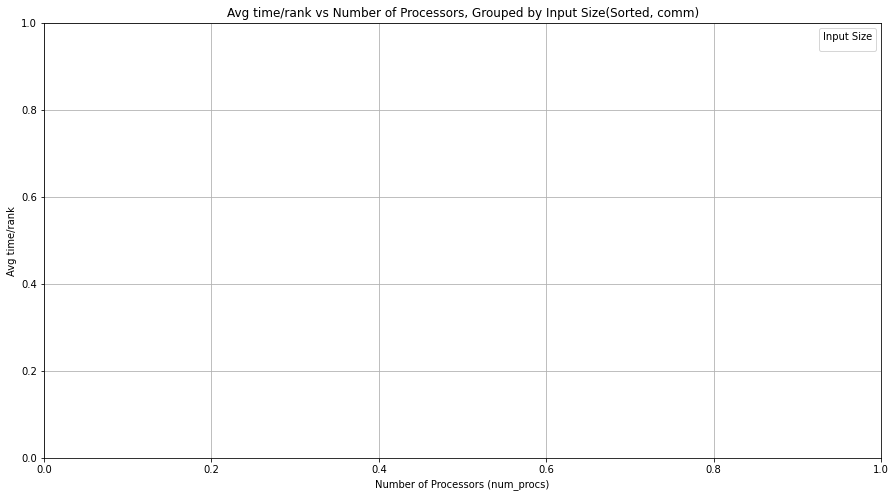

In [72]:
weak_plot("Avg time/rank", "Sorted", "comm", df)

/tmp/job.11802908/ipykernel_147155/3986468264.py:167: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Input Size')


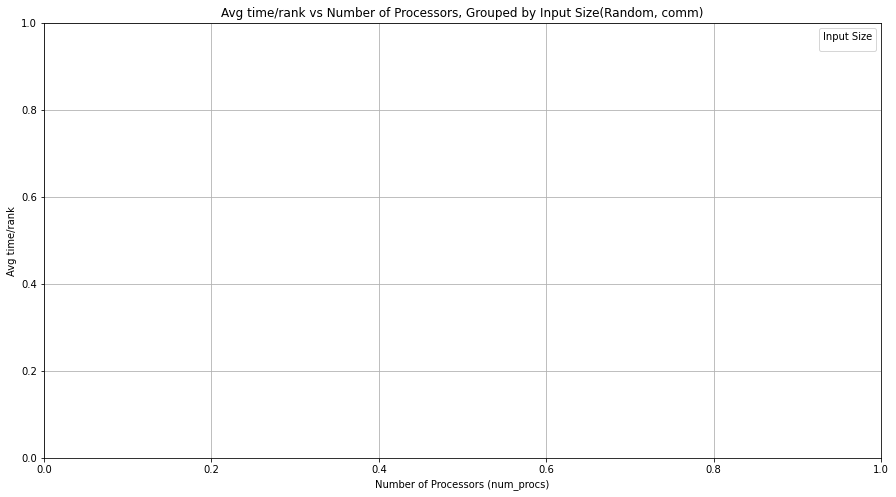

In [70]:
weak_plot("Avg time/rank", "Random", "comm", df)

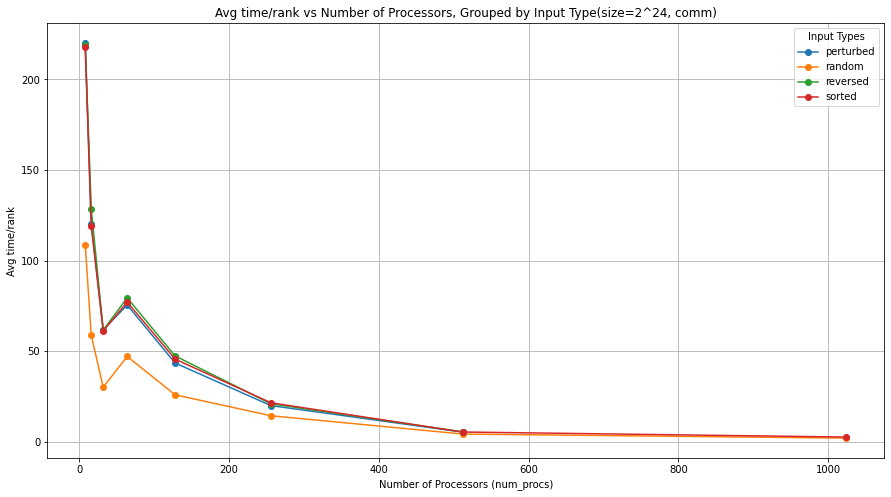

In [77]:
strong_plot("Avg time/rank", 2**24, "comm", df)

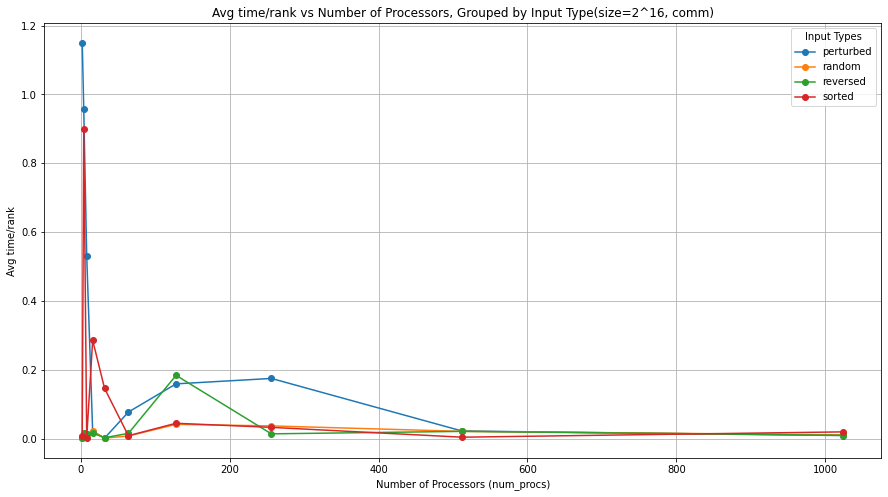

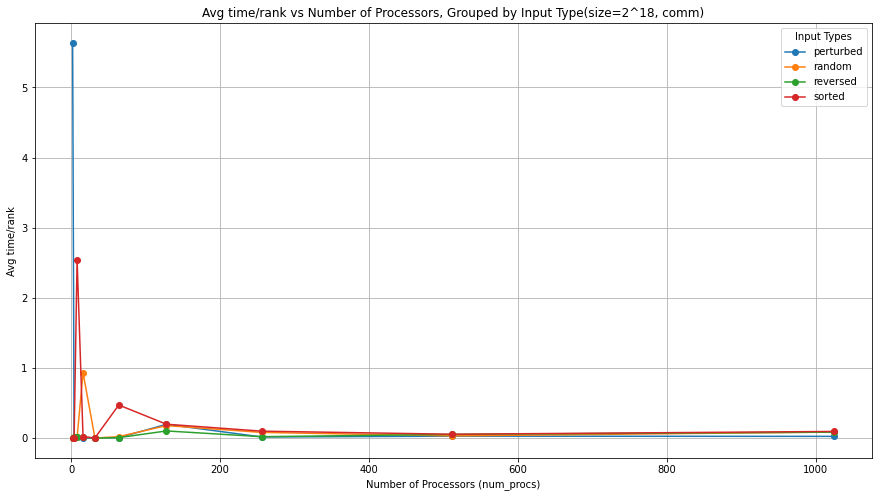

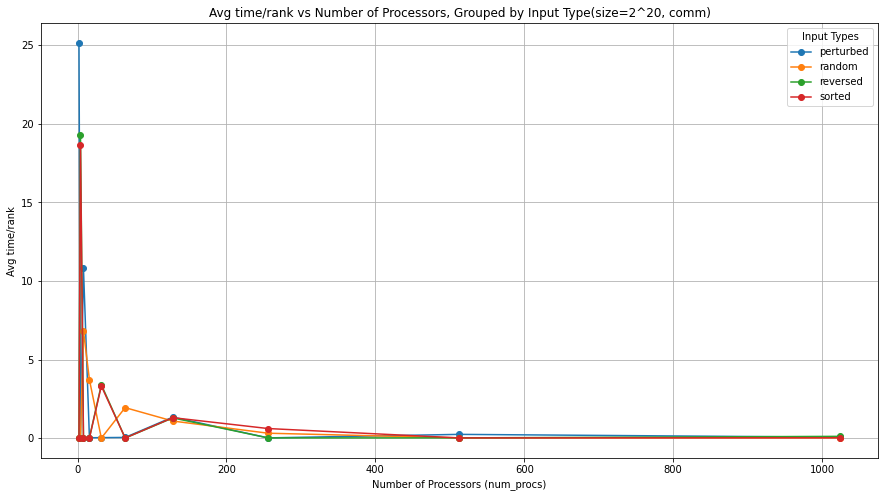

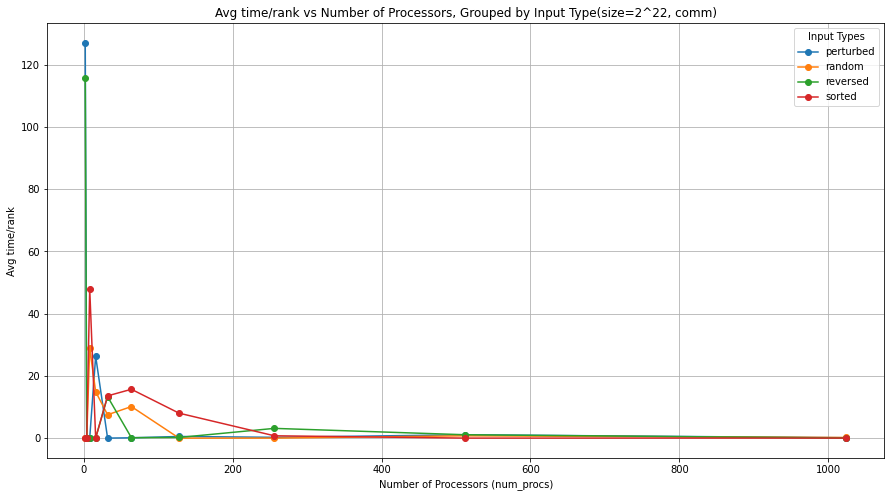

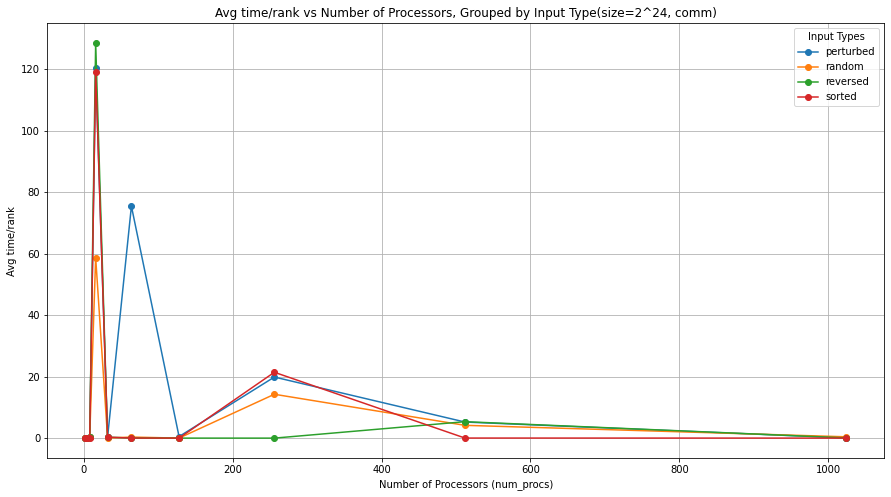

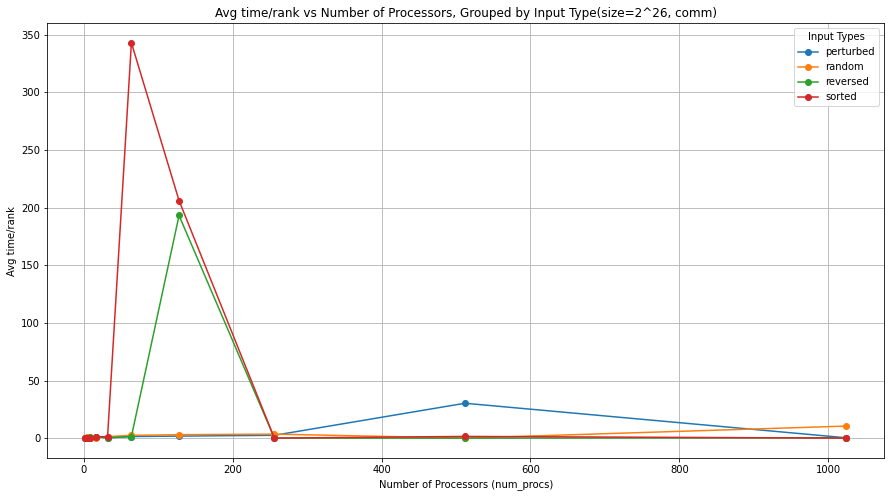

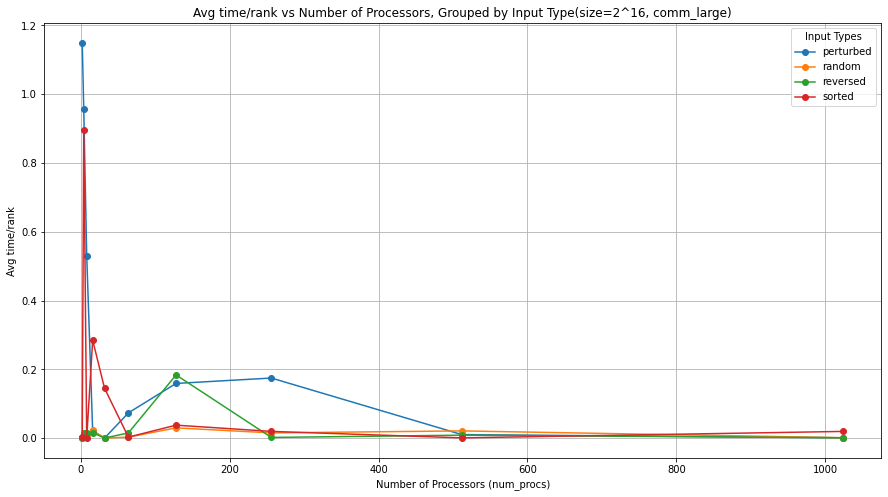

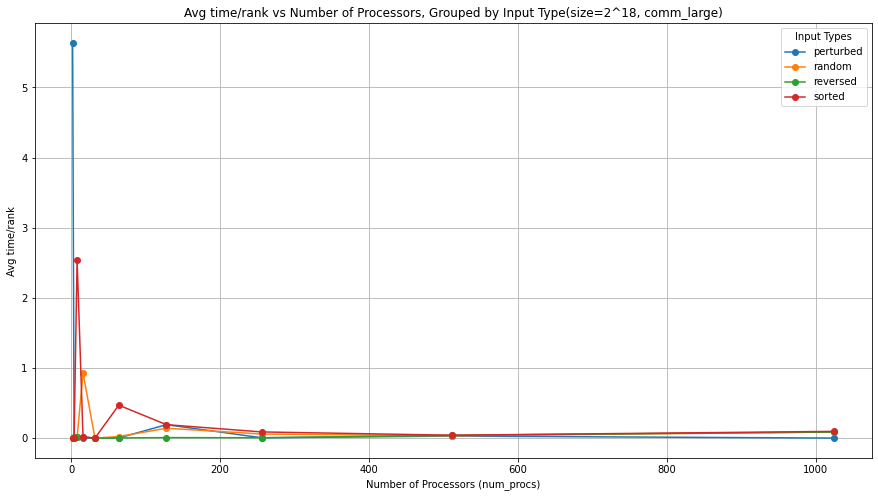

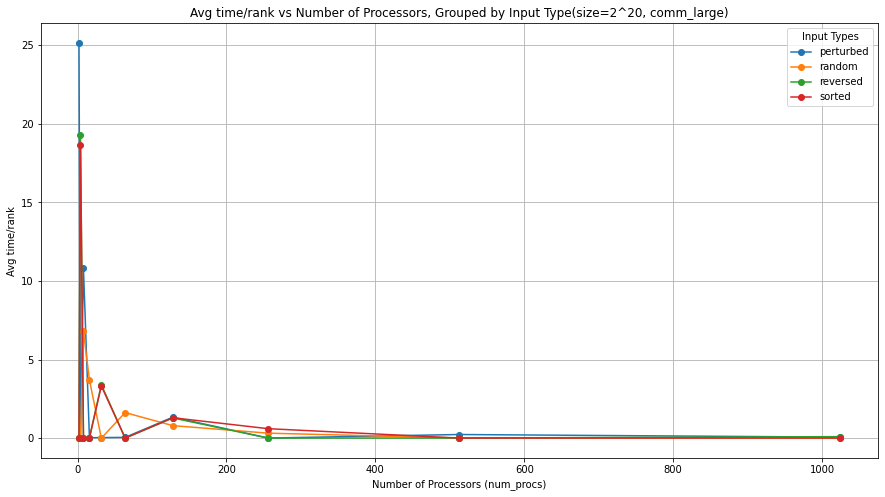

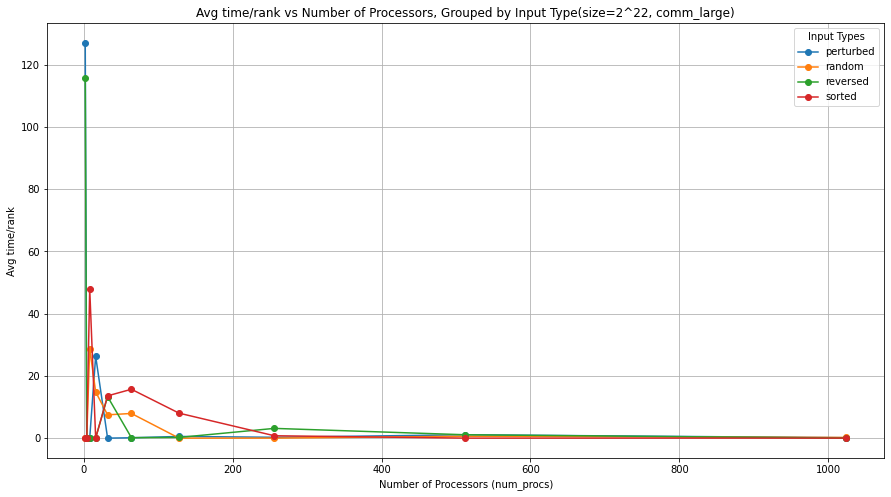

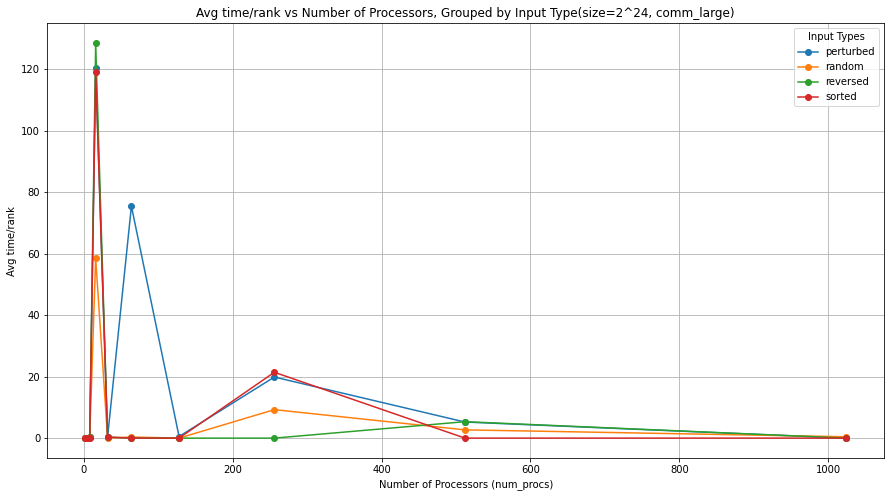

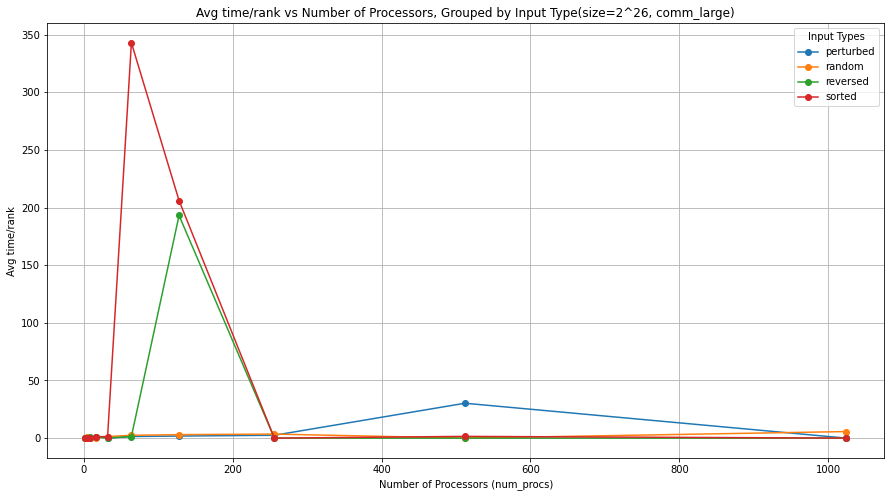

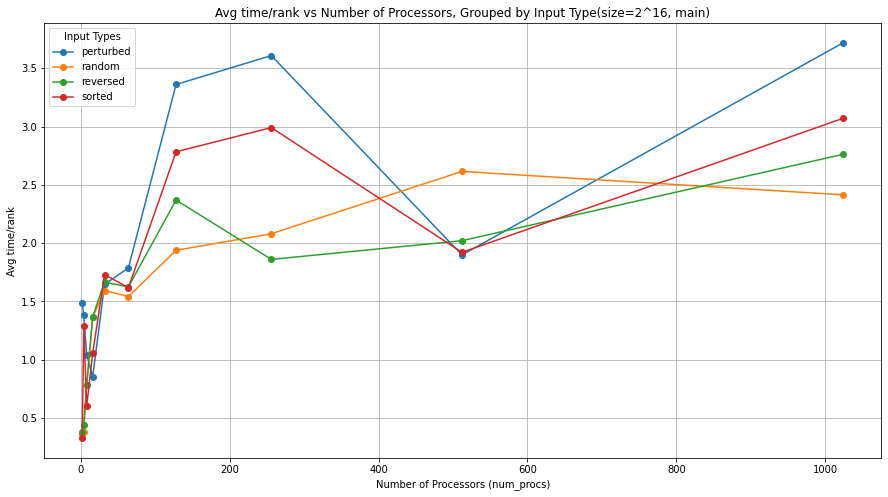

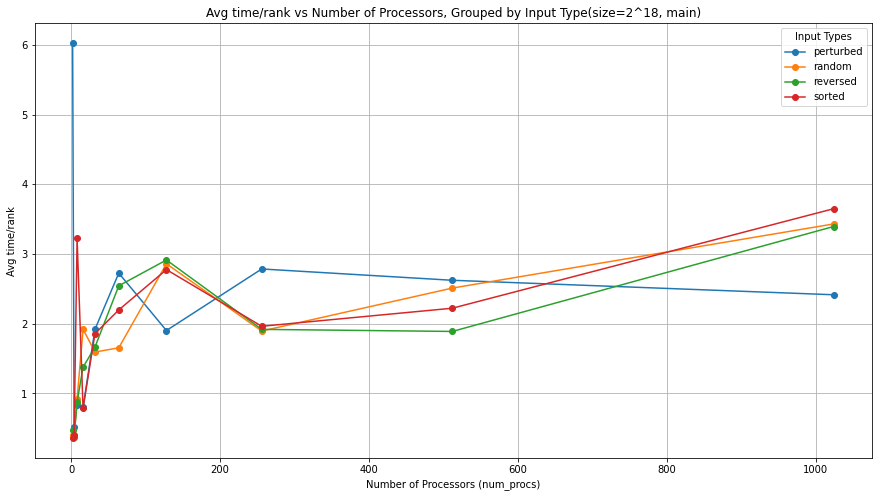

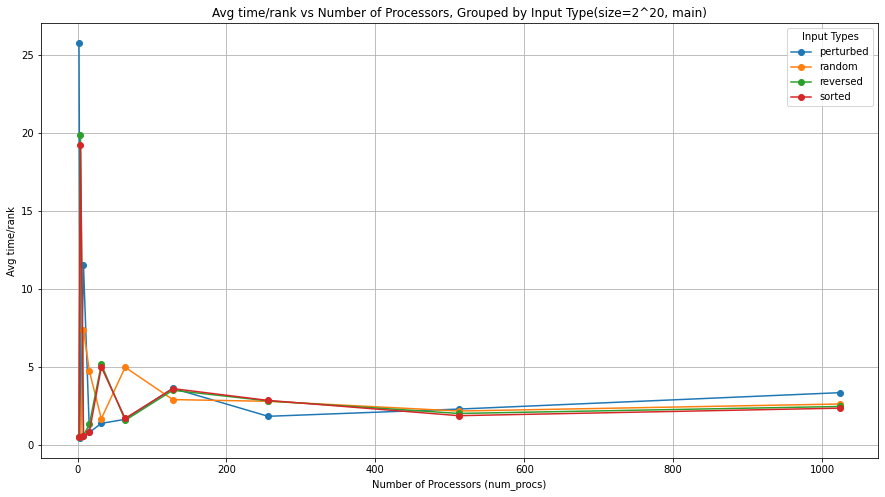

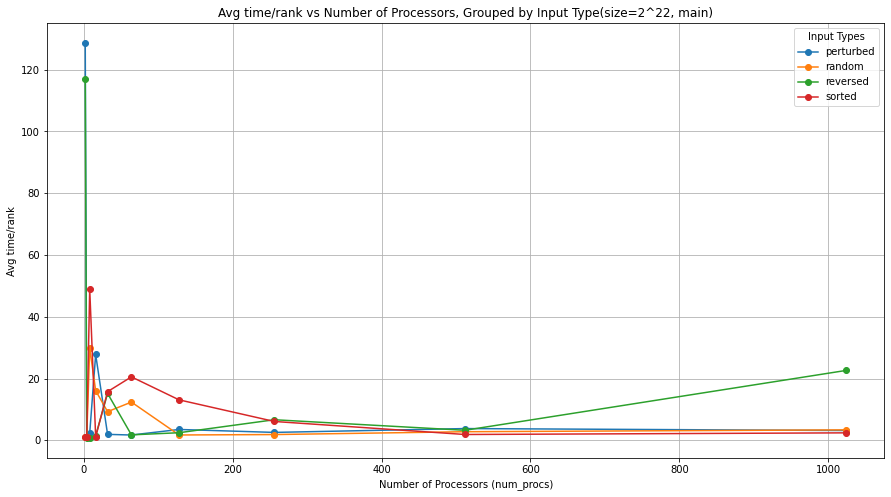

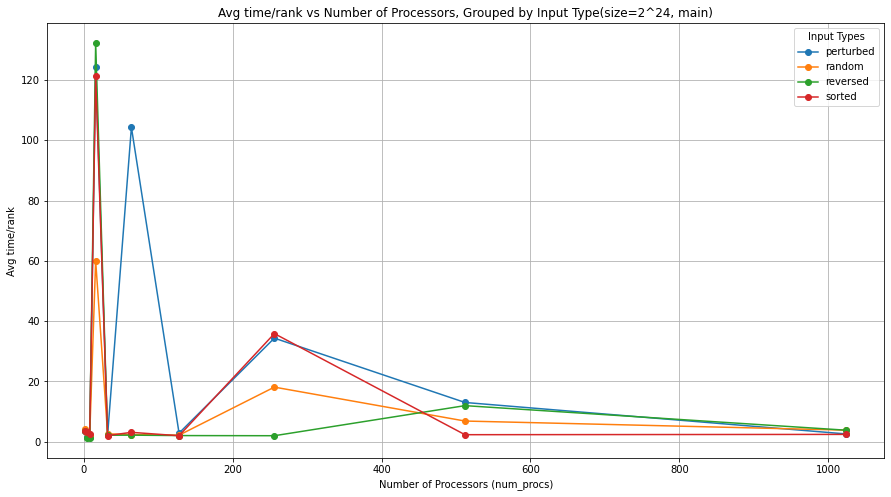

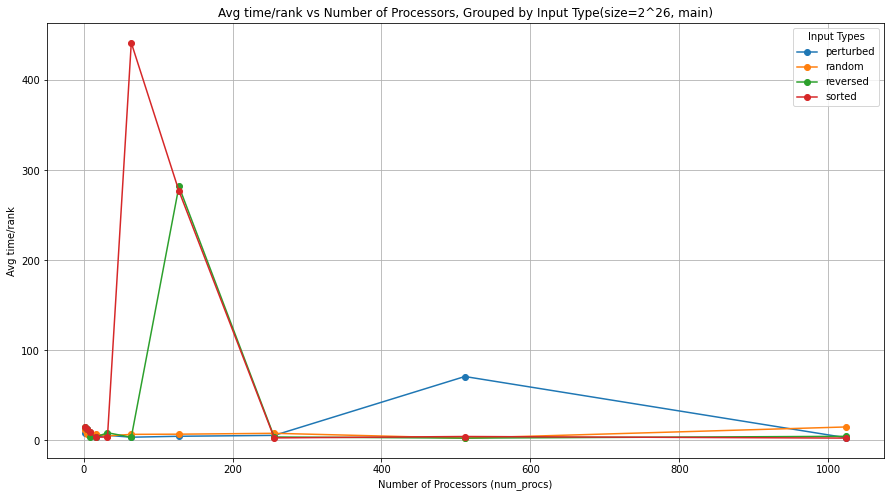

In [72]:
# strong scaling plots 3*6 = 18
for region in ["comm", "comm_large", "main"]:
    for size in [2**16, 2**18, 2**20, 2**22, 2**24, 2**26]:
        strong_plot("Avg time/rank", size, region, df)

/tmp/job.11802908/ipykernel_147155/3986468264.py:167: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Input Size')


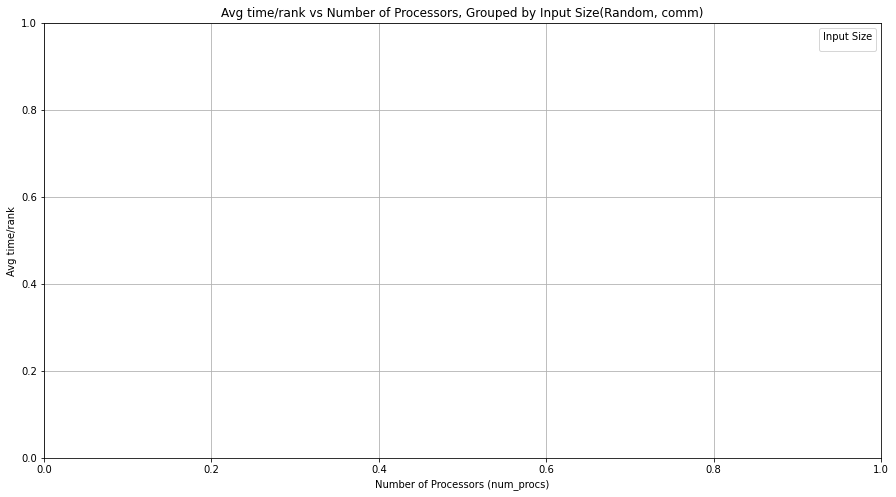

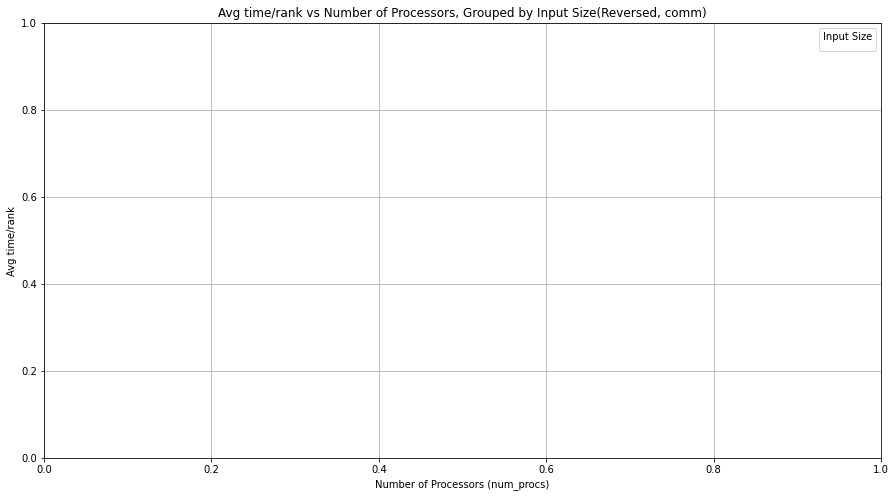

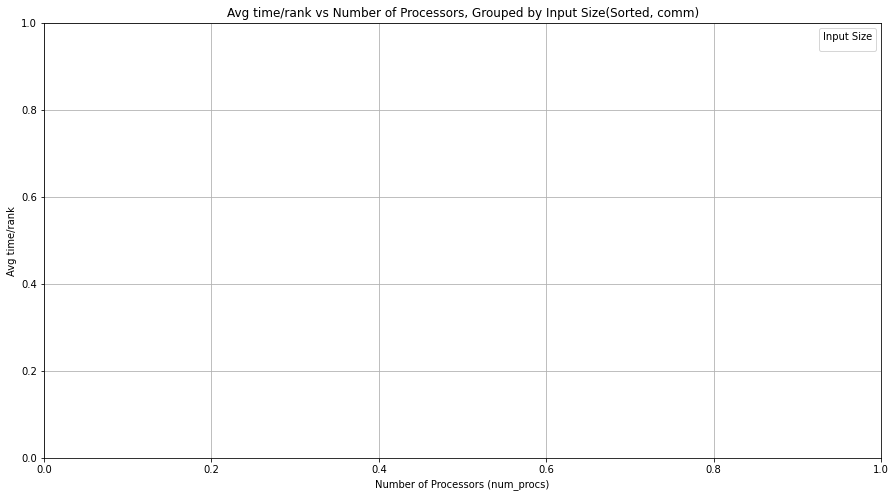

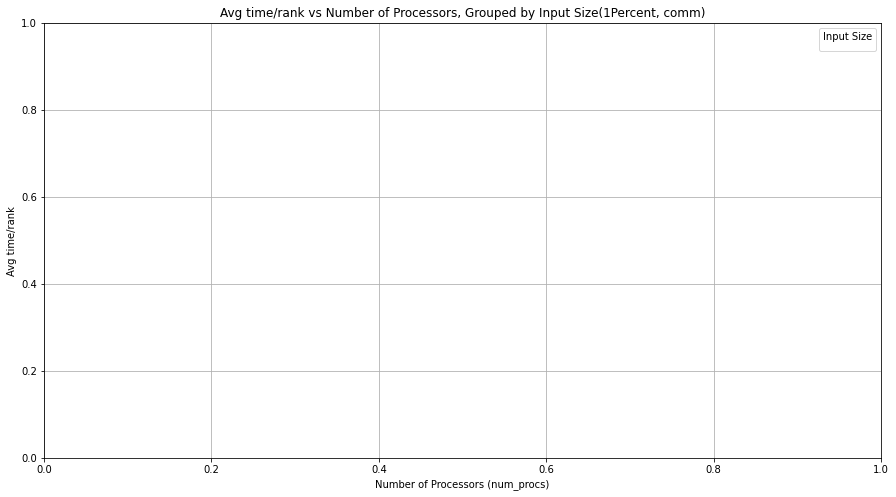

In [73]:
# weak scaling plots 3*4 = 12
for region in ["main"]:
    for input_type in ["Random", "Reversed", "Sorted", "1Percent"]:
        weak_plot("Avg time/rank", input_type, "comm", df)
        

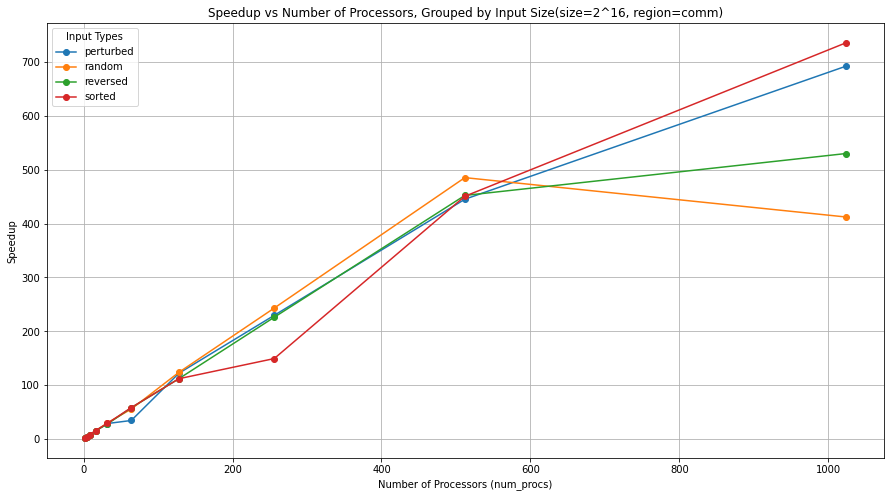

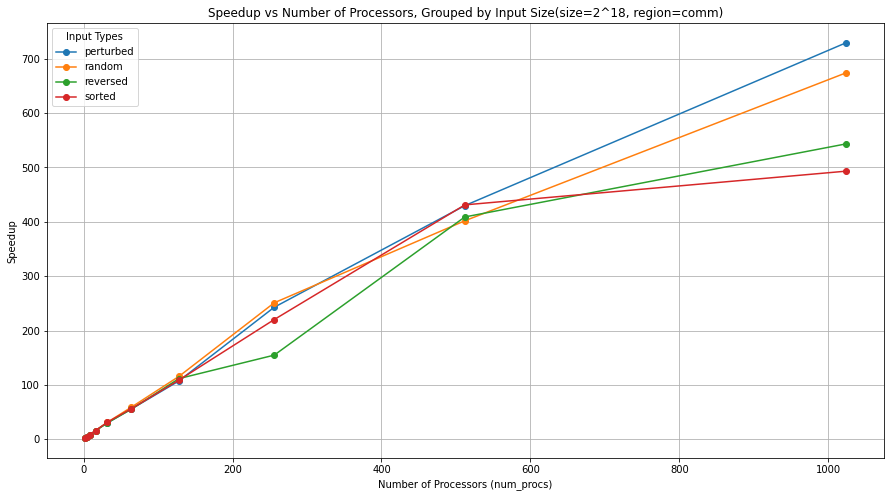

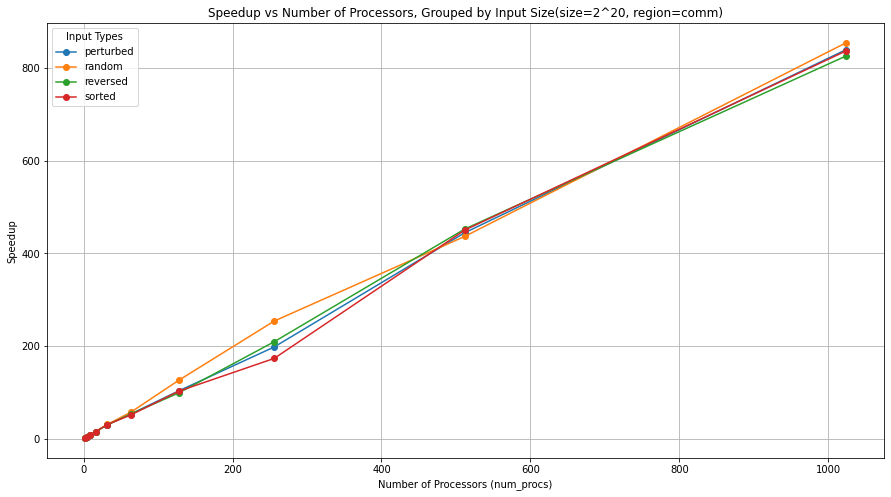

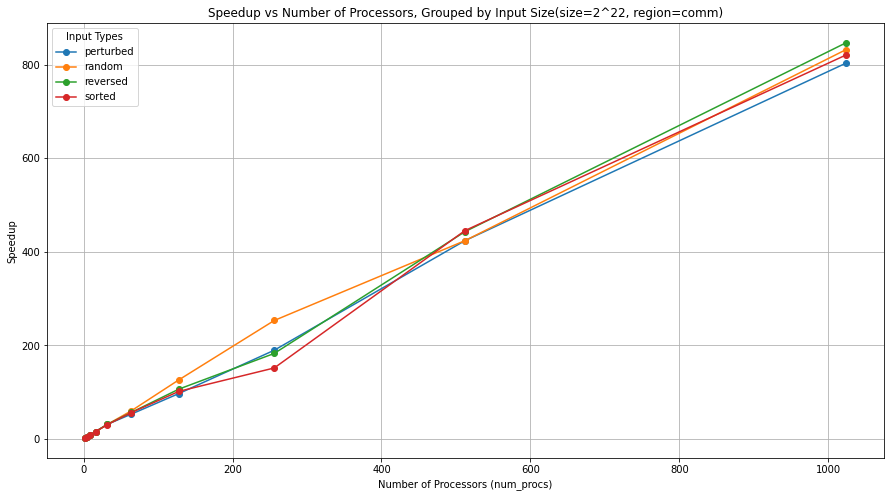

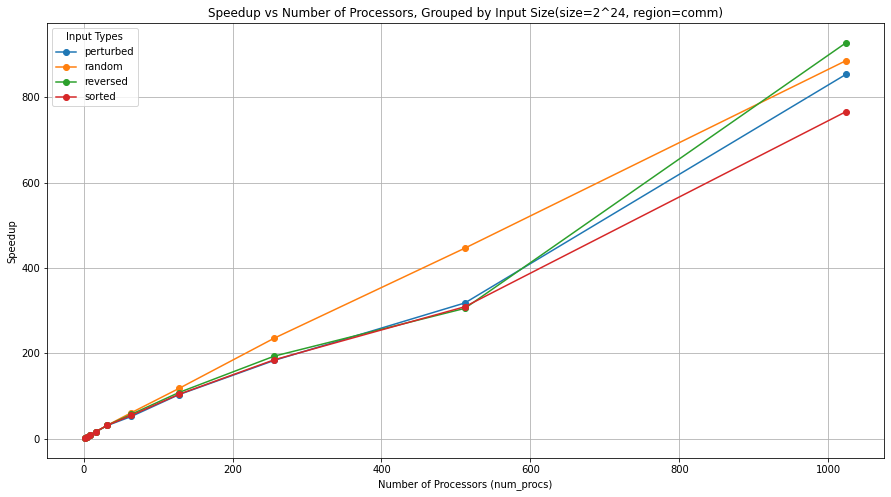

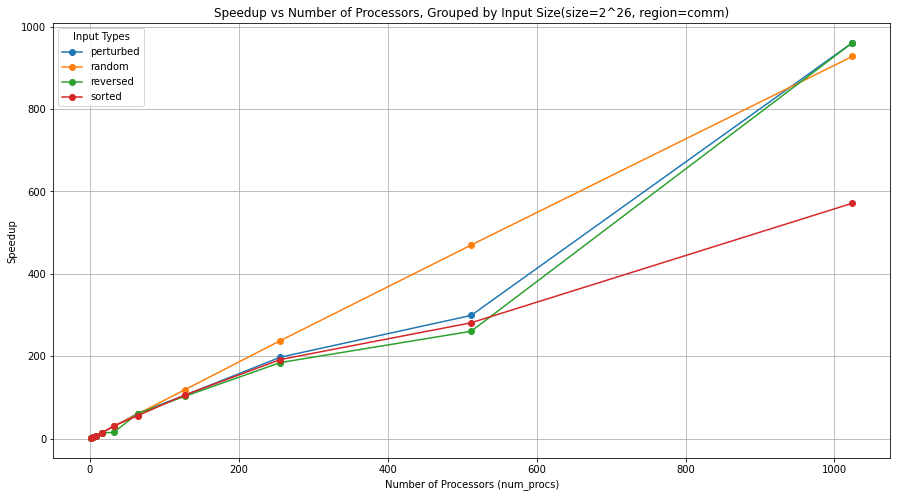

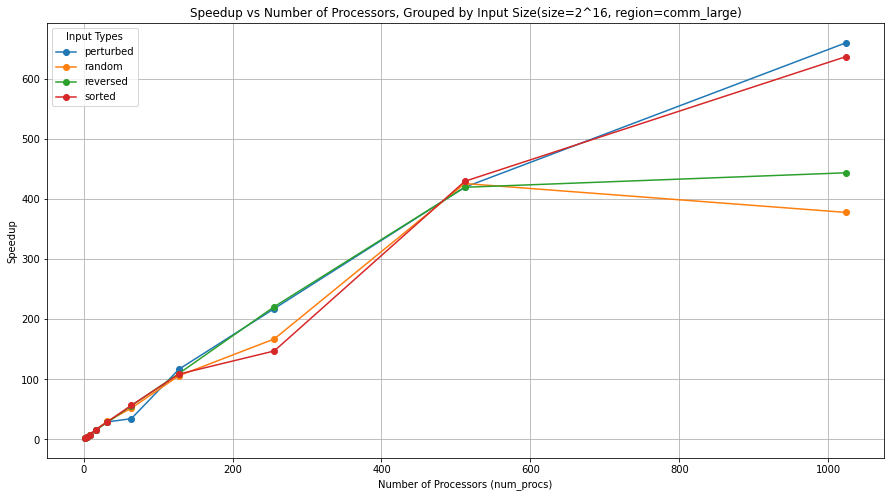

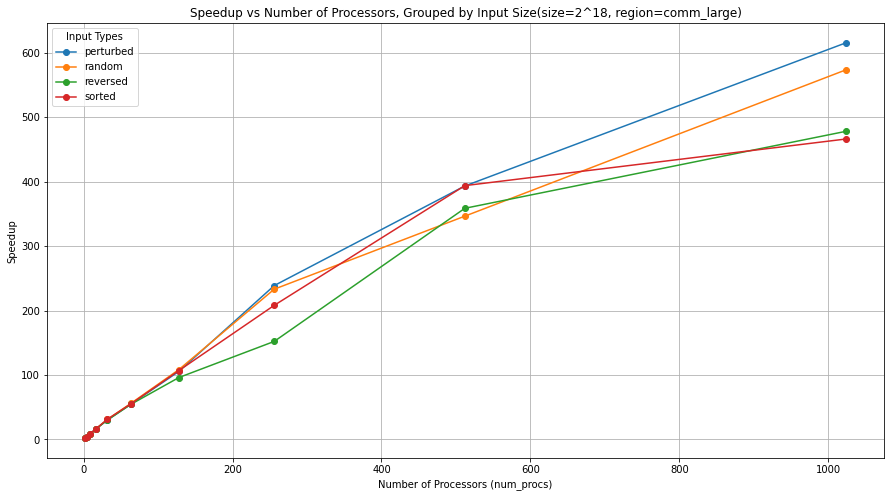

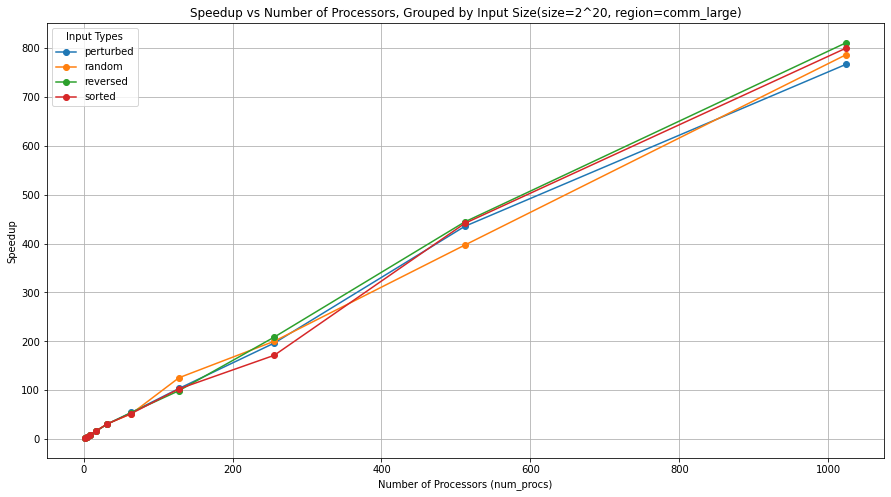

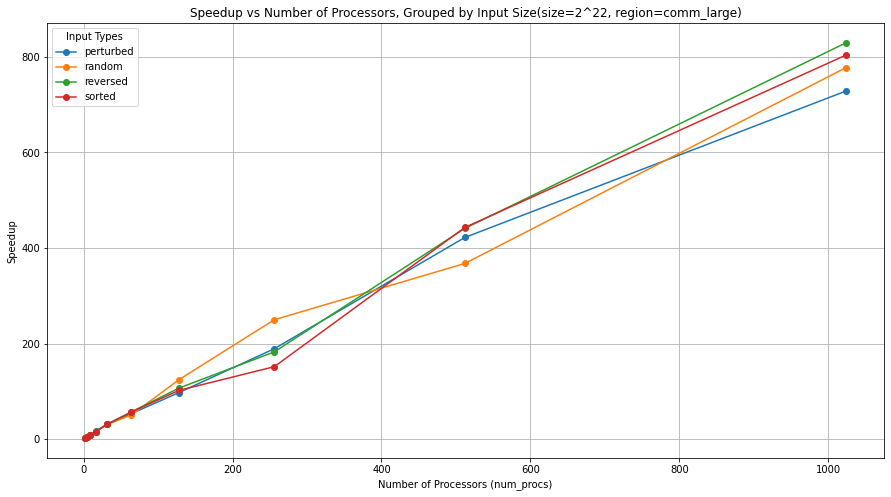

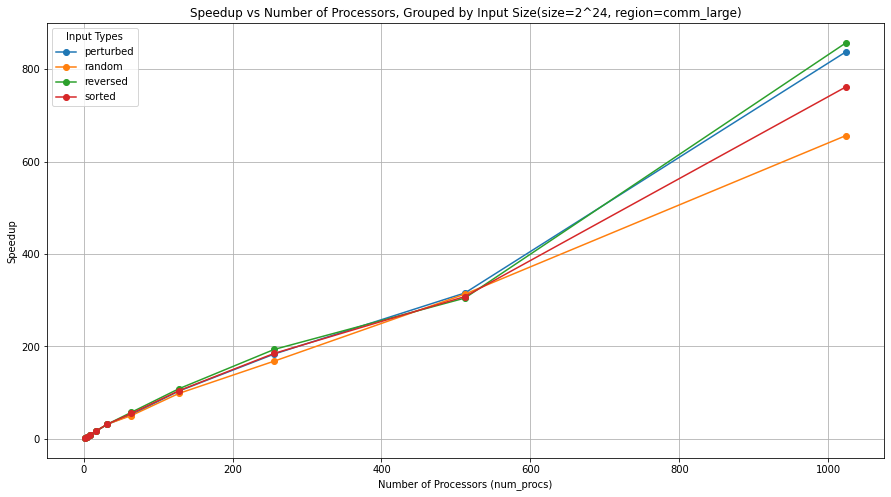

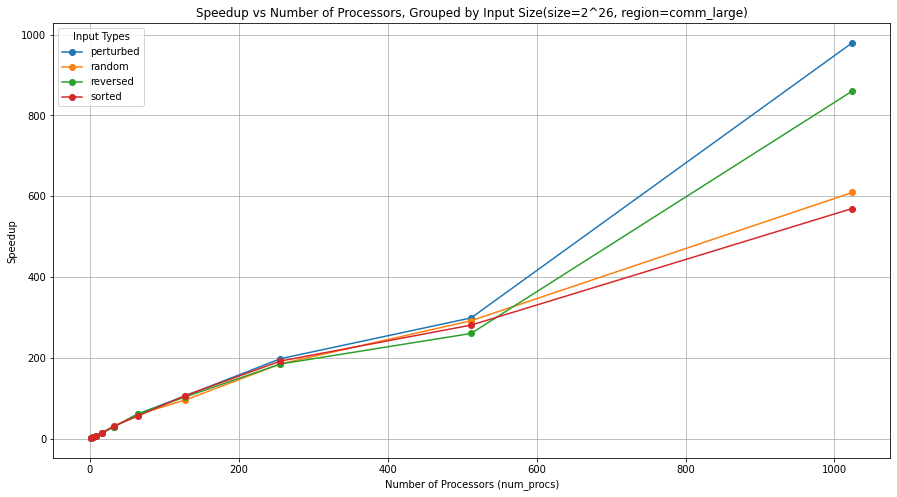

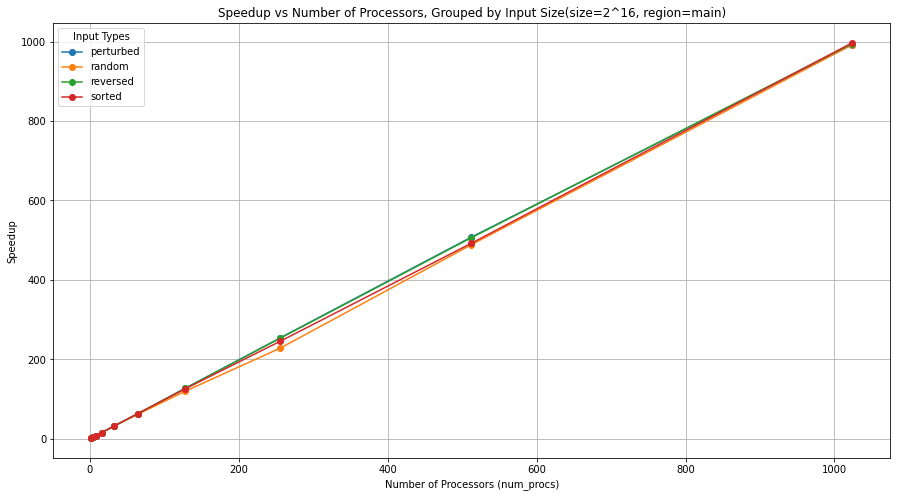

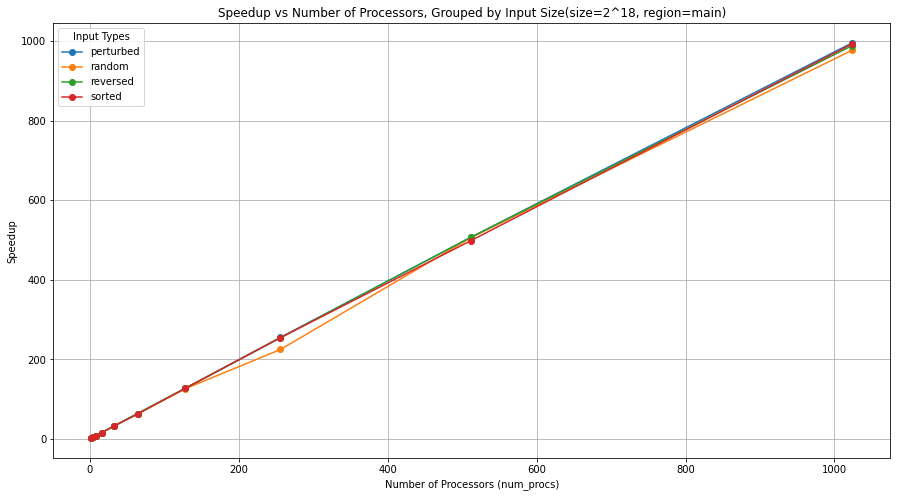

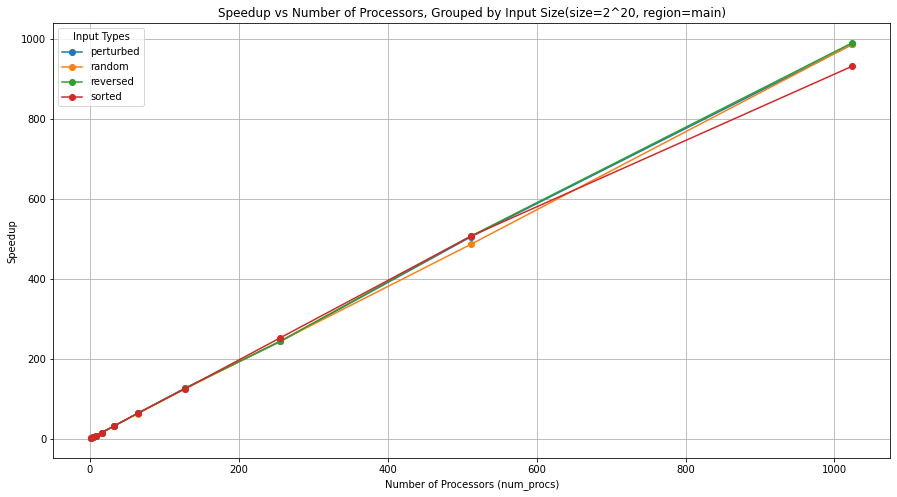

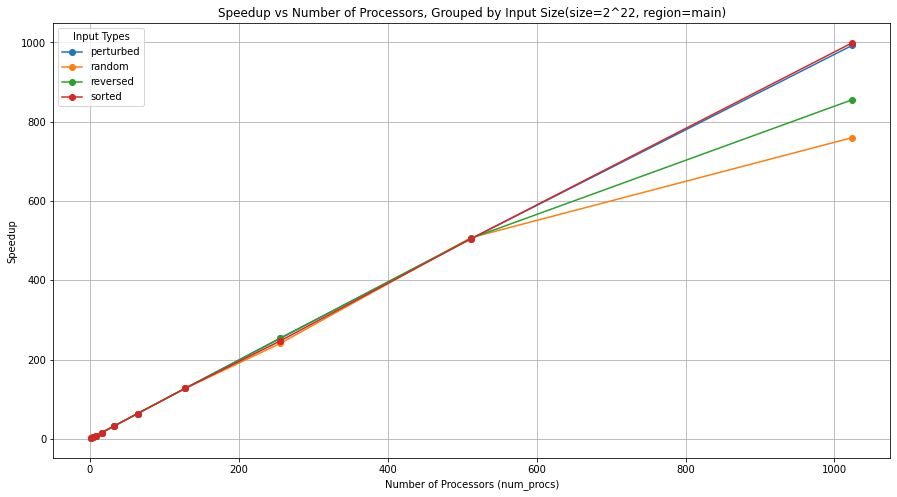

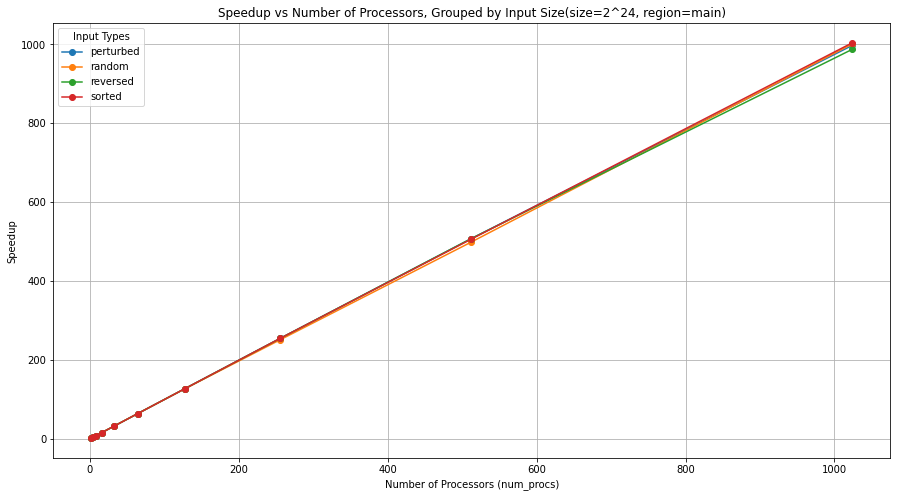

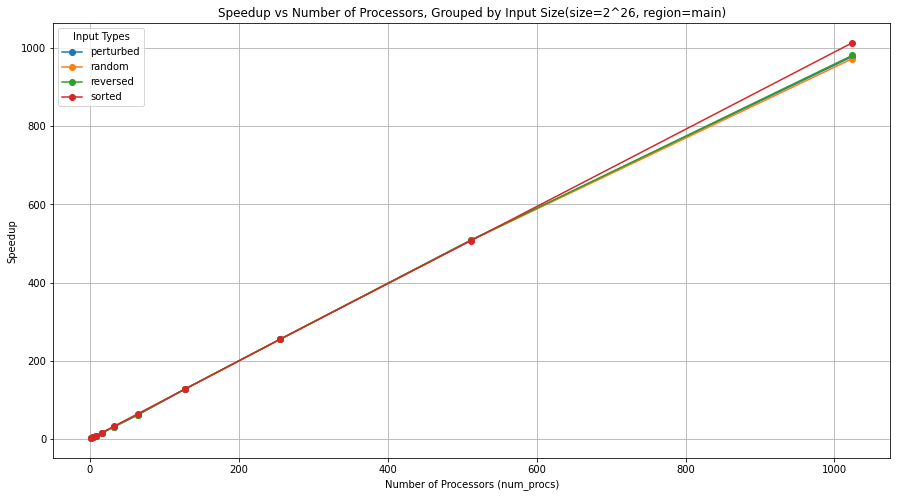

In [74]:
# speed up plots
for region in ["comm", "comm_large", "main"]:
    for size in [2**16, 2**18, 2**20, 2**22, 2**24, 2**26]:
        speedup_plot(size,df, region)

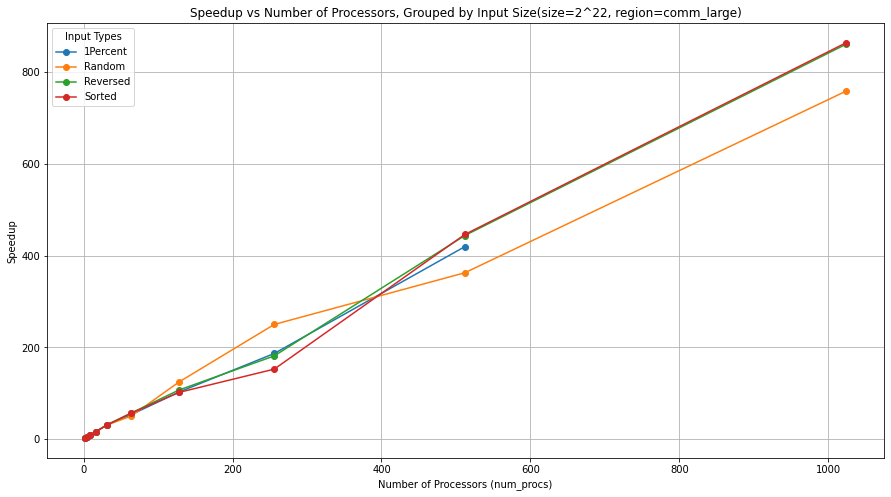

In [278]:
speedup_plot(2**22, df, "comm_large")

/tmp/job.11802908/ipykernel_256413/2689015630.py:173: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Input Size')


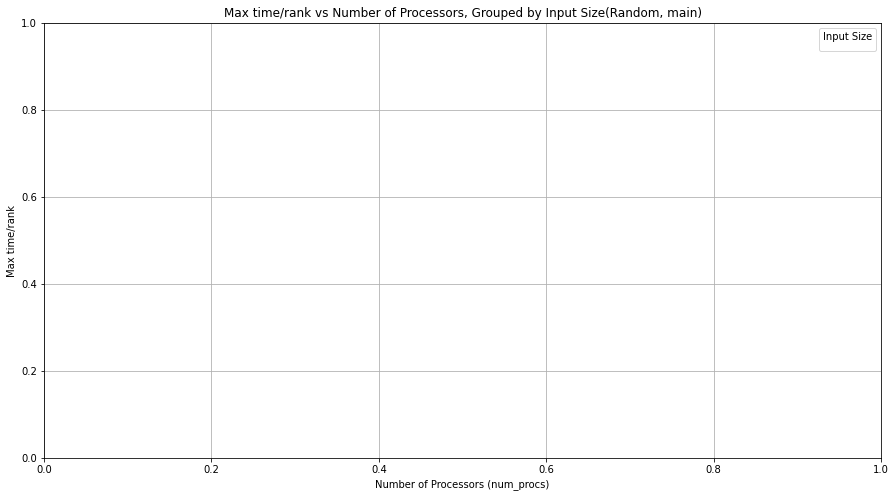

In [78]:
weak_plot("Max time/rank", "Random", "main", df)


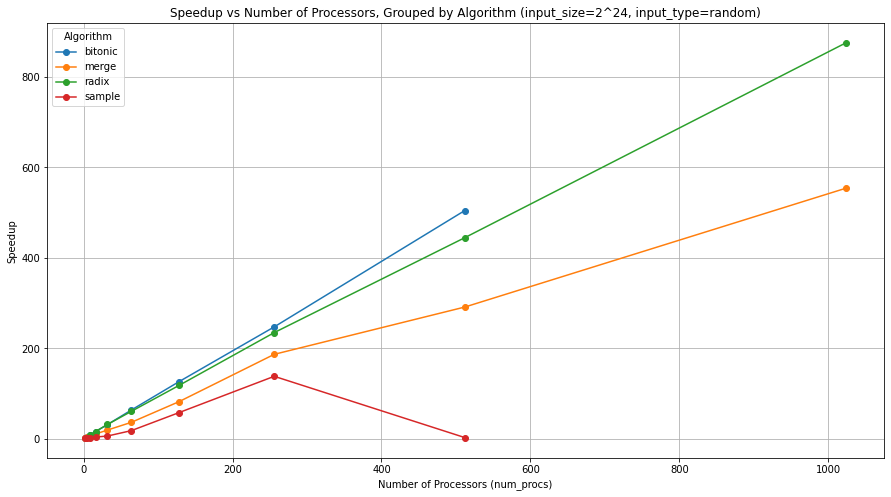

In [102]:
speedup_plot_by_algorithm(2**24, "random", df)

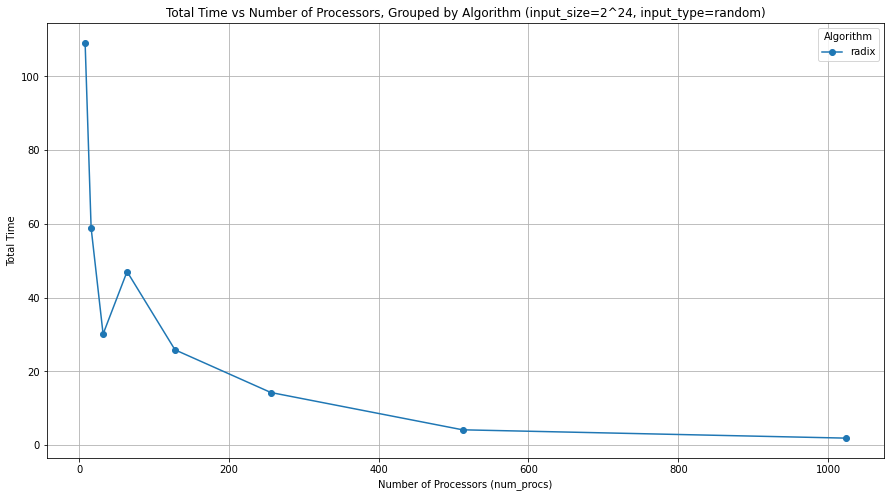

In [79]:
total_time_plot_by_algorithm(2**24, "random", df)

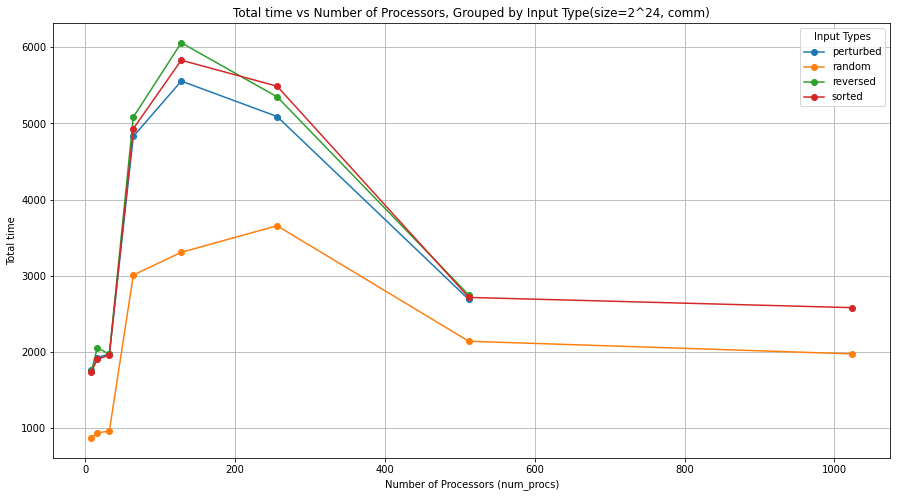

In [82]:
strong_plot("Total time", 2**24, "comm", df)